In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import contractions
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/HP/OneDrive/Desktop/project_4_everything/New folder/Product_details.csv')

In [3]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [4]:
df[['Product_Type', 'Sentiment']].apply(pd.value_counts)

,Product_Type,Sentiment
0,52,111.0
1,59,399.0
2,465,3765.0
3,300,2089.0
4,19,NaN
5,213,NaN
6,665,NaN
7,327,NaN
8,194,NaN
9,4070,NaN


In [30]:
df['Sentiment'].value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [5]:
df.shape

(6364, 4)

In [6]:
df.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment'], dtype='object')

In [7]:
df.sum().isnull()

Text_ID                False
Product_Description    False
Product_Type           False
Sentiment              False
dtype: bool

In [29]:
df.describe()

,Text_ID,Product_Type,Sentiment
count,6364.000000,6364.000000,6364.000000
mean,4568.862822,7.462445,2.230673
std,2621.198346,2.440492,0.638413
min,1.000000,0.000000,0.000000
25%,2297.750000,6.000000,2.000000
50%,4587.500000,9.000000,2.000000
75%,6827.500000,9.000000,3.000000
max,9092.000000,9.000000,3.000000


#pre processing-I

# Data Cleaning

In [9]:
import re

In [10]:
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    text=re.sub(r"^a-zA-z0-9","",text)
    text=re.sub(r"[^\w\s]","",text)
    
    return text

In [11]:
df['Review']=df.apply(lambda x: cleantext(x['Product_Description']),axis=1)

In [12]:
df['Review']

0       The Web DesignerÛªs Guide to iOS and Android A...
1       RT mention Line for iPad  is longer today than...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass In this digita...
4       RT mention At the panel quotYour mom has an ip...
                              ...                        
6359    Thanks mention for hosting this event sxsw sxs...
6360    SXSW iPhone app is awesome but iPad app crashe...
6361    RT mention RT mention Download  free tracks fr...
6362    OH at Texas Social Media Awards You dont need ...
6363    Google launching a quotmajorquot new social ne...
Name: Review, Length: 6364, dtype: object

In [13]:
import contractions

In [14]:
df['no_contract'] = df['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [15]:
df['no_contract']

0       [The, Web, DesignerÛªs, Guide, to, iOS, and, A...
1       [RT, mention, Line, for, iPad, is, longer, tod...
2       [Crazy, that, Apple, is, opening, a, temporary...
3       [The, lesson, from, Google, One, Pass, In, thi...
4       [RT, mention, At, the, panel, quotYour, mom, h...
                              ...                        
6359    [Thanks, mention, for, hosting, this, event, s...
6360    [SXSW, iPhone, app, is, awesome, but, iPad, ap...
6361    [RT, mention, RT, mention, Download, free, tra...
6362    [OH, at, Texas, Social, Media, Awards, You, do...
6363    [Google, launching, a, quotmajorquot, new, soc...
Name: no_contract, Length: 6364, dtype: object

In [16]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A..."
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod..."
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary..."
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi..."
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h..."


In [17]:
df['expandedtext']=[' '.join(map(str,i)) for i in df['no_contract']]

In [18]:
df['expandedtext']

0       The Web DesignerÛªs Guide to iOS and Android A...
1       RT mention Line for iPad is longer today than ...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass In this digita...
4       RT mention At the panel quotYour mom has an ip...
                              ...                        
6359    Thanks mention for hosting this event sxsw sxs...
6360    SXSW iPhone app is awesome but iPad app crashe...
6361    RT mention RT mention Download free tracks fro...
6362    OH at Texas Social Media Awards You do not nee...
6363    Google launching a quotmajorquot new social ne...
Name: expandedtext, Length: 6364, dtype: object

In [19]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...


# tokenization

In [20]:
#!pip install nltk

In [21]:
import nltk

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
df['tokenized'] = df['expandedtext'].apply(word_tokenize)

In [24]:
df['tokenized']

0       [The, Web, DesignerÛªs, Guide, to, iOS, and, A...
1       [RT, mention, Line, for, iPad, is, longer, tod...
2       [Crazy, that, Apple, is, opening, a, temporary...
3       [The, lesson, from, Google, One, Pass, In, thi...
4       [RT, mention, At, the, panel, quotYour, mom, h...
                              ...                        
6359    [Thanks, mention, for, hosting, this, event, s...
6360    [SXSW, iPhone, app, is, awesome, but, iPad, ap...
6361    [RT, mention, RT, mention, Download, free, tra...
6362    [OH, at, Texas, Social, Media, Awards, You, do...
6363    [Google, launching, a, quotmajorquot, new, soc...
Name: tokenized, Length: 6364, dtype: object

In [25]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A..."
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod..."
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary..."
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi..."
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h..."


In [26]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

In [27]:
df['lower']

0       [the, web, designerûªs, guide, to, ios, and, a...
1       [rt, mention, line, for, ipad, is, longer, tod...
2       [crazy, that, apple, is, opening, a, temporary...
3       [the, lesson, from, google, one, pass, in, thi...
4       [rt, mention, at, the, panel, quotyour, mom, h...
                              ...                        
6359    [thanks, mention, for, hosting, this, event, s...
6360    [sxsw, iphone, app, is, awesome, but, ipad, ap...
6361    [rt, mention, rt, mention, download, free, tra...
6362    [oh, at, texas, social, media, awards, you, do...
6363    [google, launching, a, quotmajorquot, new, soc...
Name: lower, Length: 6364, dtype: object

In [28]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[the, web, designerûªs, guide, to, ios, and, a..."
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod..."
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[crazy, that, apple, is, opening, a, temporary..."
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[the, lesson, from, google, one, pass, in, thi..."
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[rt, mention, at, the, panel, quotyour, mom, h..."


In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
wordc=' '.join(df['expandedtext'])

In [33]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

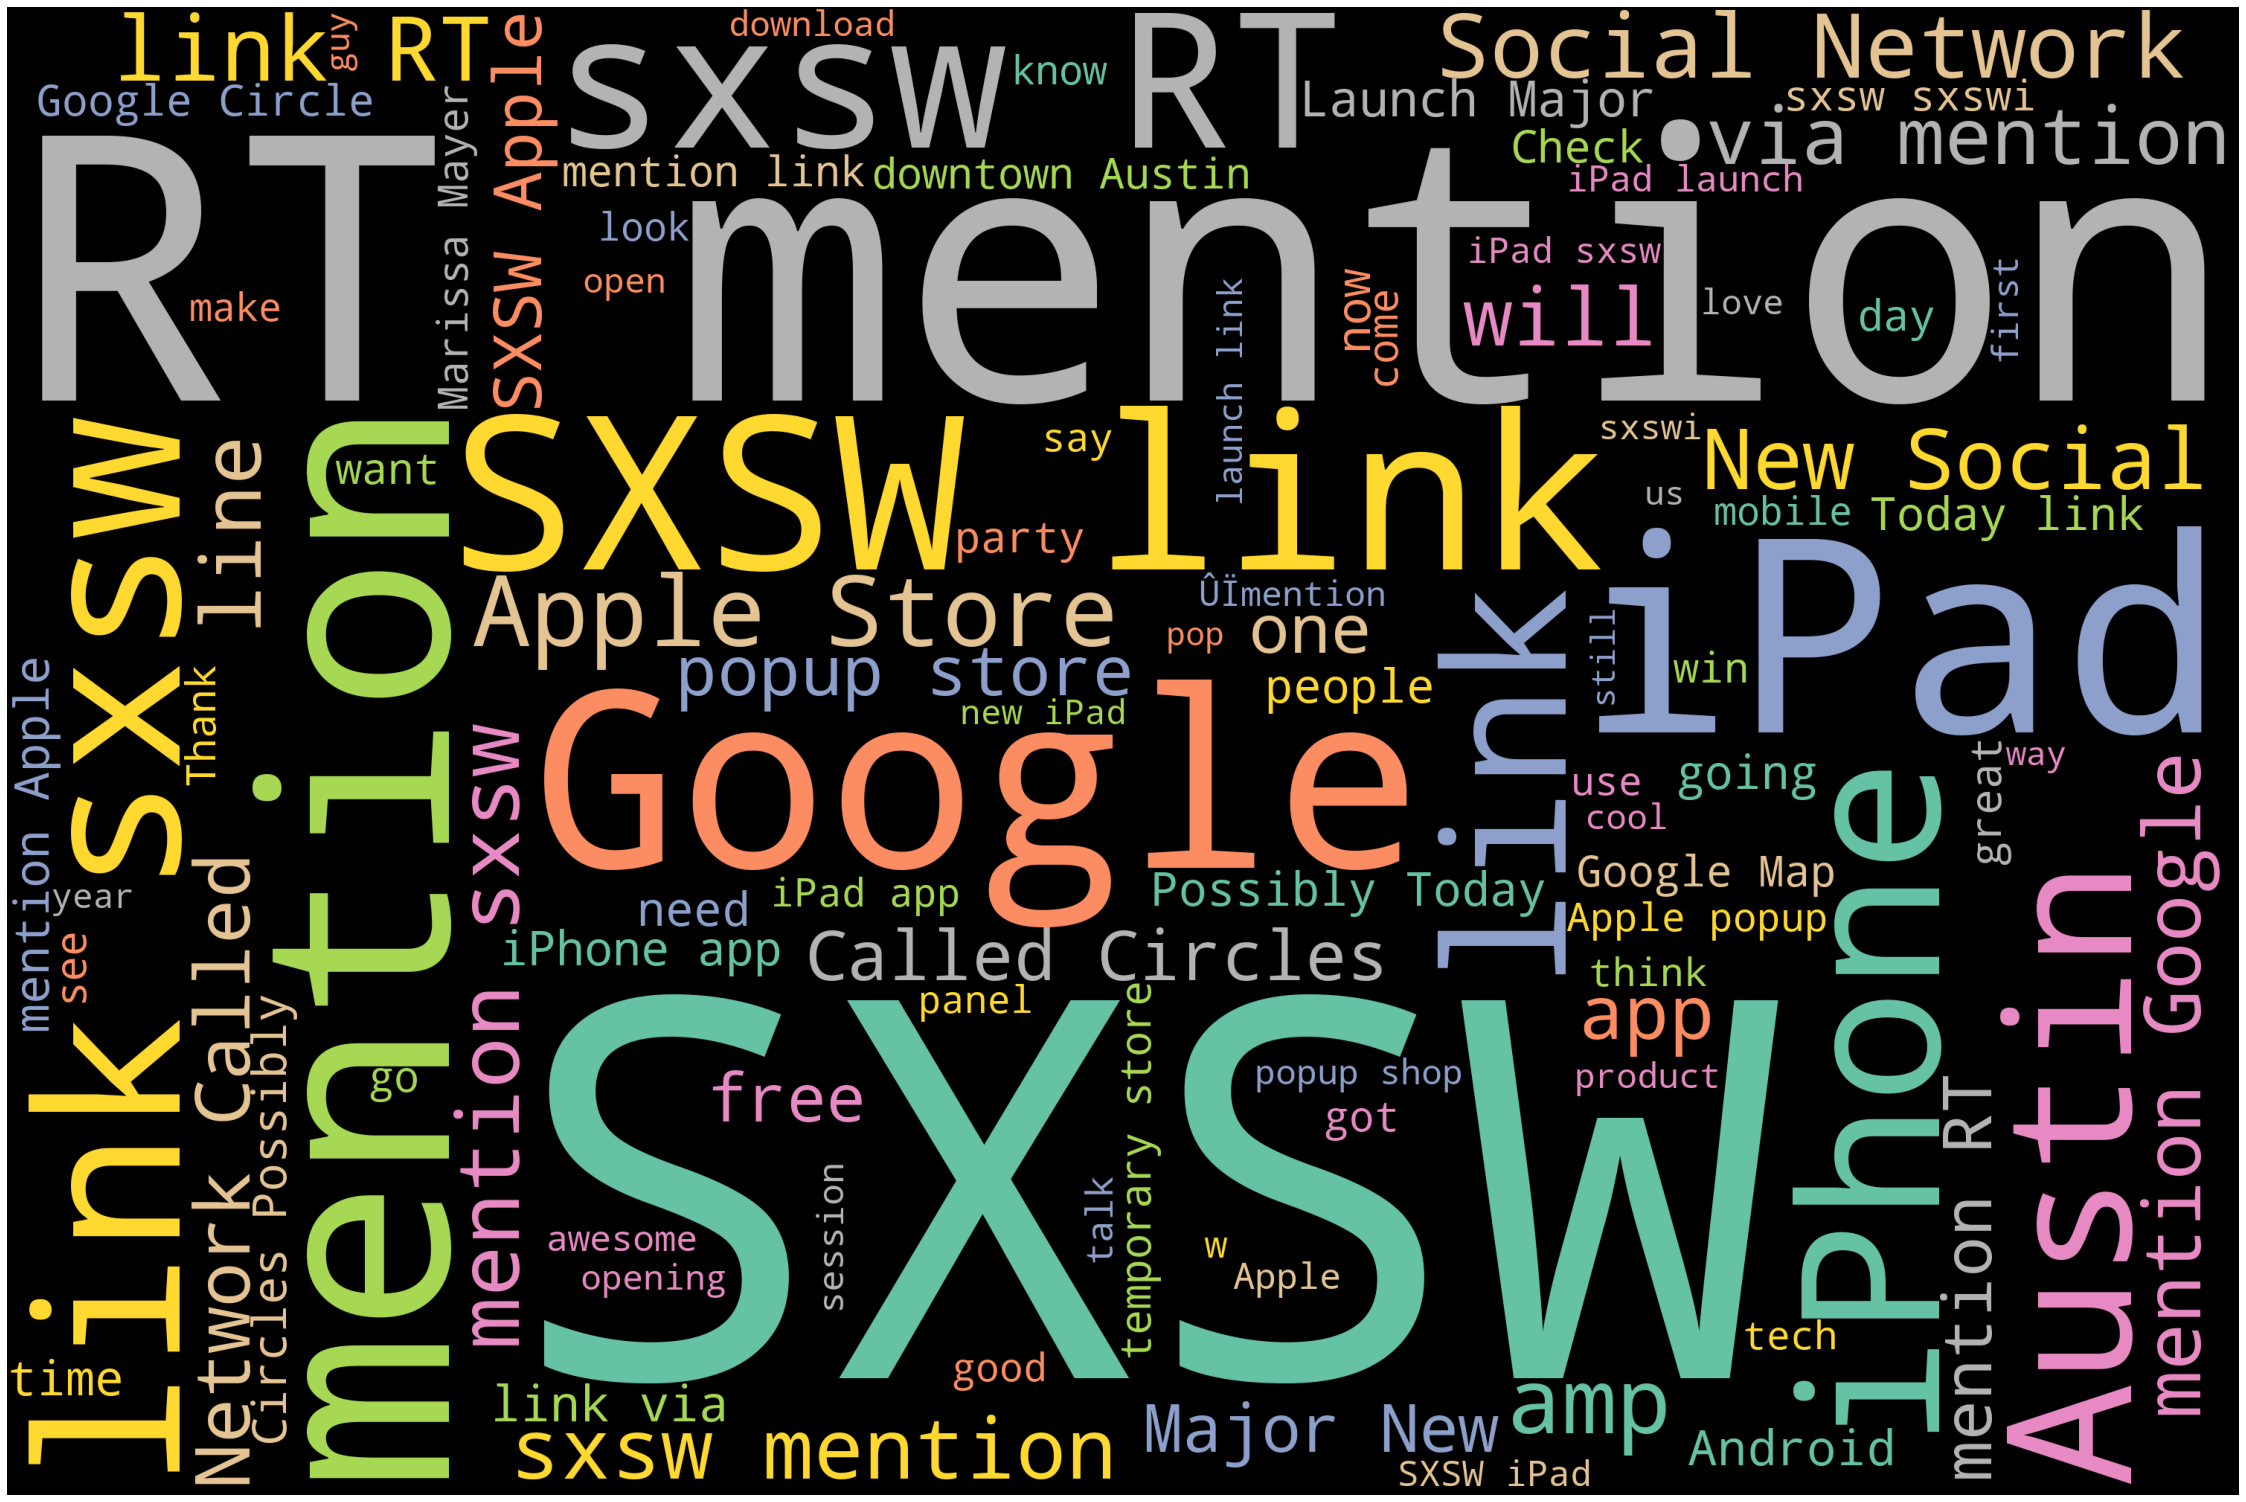

In [34]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(wordc)
# Plot
plot_cloud(wordcloud)

# top 20 most common words from above wordcloud

In [37]:
from collections import Counter
p = Counter(" ".join(df['expandedtext']).split()).most_common(20)
result = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(result)

       Word  Frequency
0   mention       4836
1      SXSW       3294
2      sxsw       3153
3      link       3035
4       the       2707
5        to       2481
6        RT       2048
7        at       2039
8       for       1680
9         a       1501
10     iPad       1467
11   Google       1364
12       in       1289
13       is       1249
14    Apple       1223
15       of       1186
16      and       1062
17        I        919
18   iPhone        891
19       on        871


# Pre processing -II

# stemming

In [38]:
from nltk.stem import PorterStemmer

In [39]:
st = PorterStemmer()
df['stemmed'] = df['expandedtext'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()])) # Stem every word.


In [40]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower,stemmed
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[the, web, designerûªs, guide, to, ios, and, a...",the web designerûª guid to io and android app ...
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod...",rt mention line for ipad is longer today than ...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[crazy, that, apple, is, opening, a, temporary...",crazi that appl is open a temporari store in a...
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[the, lesson, from, google, one, pass, in, thi...",the lesson from googl one pass in thi digit en...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[rt, mention, at, the, panel, quotyour, mom, h...",rt mention at the panel quotyour mom ha an ipa...


# lemmatization

In [41]:
from textblob import Word

In [42]:
df['lemma'] =df['stemmed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [43]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower,stemmed,lemma
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[the, web, designerûªs, guide, to, ios, and, a...",the web designerûª guid to io and android app ...,the web designerûª guid to io and android app ...
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod...",rt mention line for ipad is longer today than ...,rt mention line for ipad is longer today than ...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[crazy, that, apple, is, opening, a, temporary...",crazi that appl is open a temporari store in a...,crazi that appl is open a temporari store in a...
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[the, lesson, from, google, one, pass, in, thi...",the lesson from googl one pass in thi digit en...,the lesson from googl one pas in thi digit env...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[rt, mention, at, the, panel, quotyour, mom, h...",rt mention at the panel quotyour mom ha an ipa...,rt mention at the panel quotyour mom ha an ipa...


In [102]:
# now, N-grams to capture semantic meaning

# Bi gram of top 20 words

In [48]:
def top_2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = top_2_words(df["lemma"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

,Bi-gram,Freq
0,rt mention,2004
1,at sxsw,1332
2,sxsw link,662
3,link sxsw,522
4,for sxsw,421
5,appl store,396
6,mention mention,361
7,social network,332
8,at the,304
9,mention sxsw,300


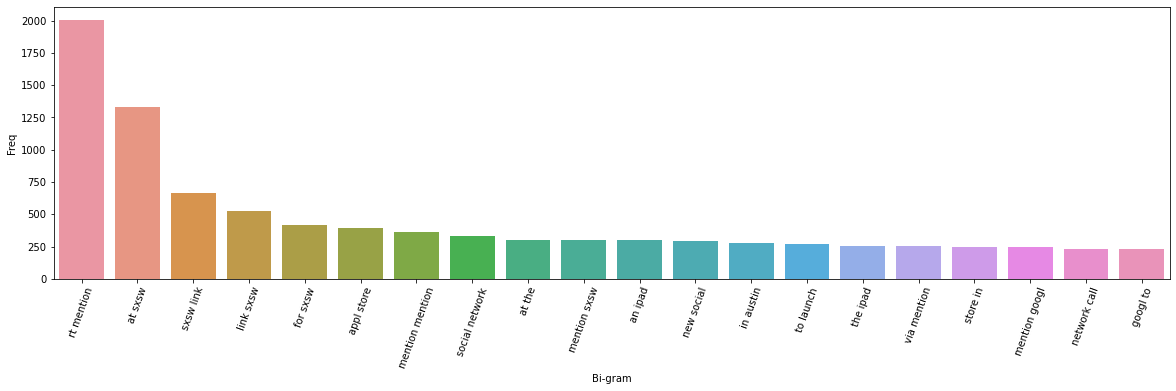

In [52]:
top2_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top2_bigram["Bi-gram"],y=top2_bigram["Freq"]);
plot.set_xticklabels(rotation=70,labels = top2_bigram["Bi-gram"]);

# tri gram of top 20 words

In [53]:
def top_3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [54]:
top3_words = top_3_words(df["lemma"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(20)

,Tri-gram,Freq
0,new social network,277
1,at sxsw link,240
2,social network call,232
3,network call circl,217
4,googl to launch,210
5,major new social,204
6,launch major new,199
7,rt mention googl,193
8,to launch major,191
9,link via mention,182


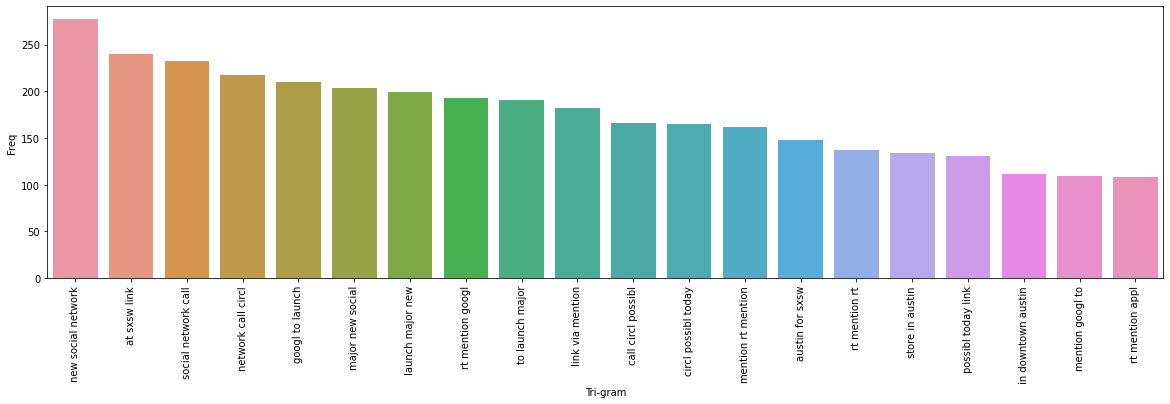

In [55]:
#import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# polarity

In [44]:
from textblob import TextBlob

In [46]:
df['polarity'] = df['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )
df[['expandedtext','polarity']].head()

,expandedtext,polarity
0,The Web DesignerÛªs Guide to iOS and Android A...,0.0
1,RT mention Line for iPad is longer today than ...,0.3
2,Crazy that Apple is opening a temporary store ...,0.0
3,The lesson from Google One Pass In this digita...,0.0
4,RT mention At the panel quotYour mom has an ip...,0.0


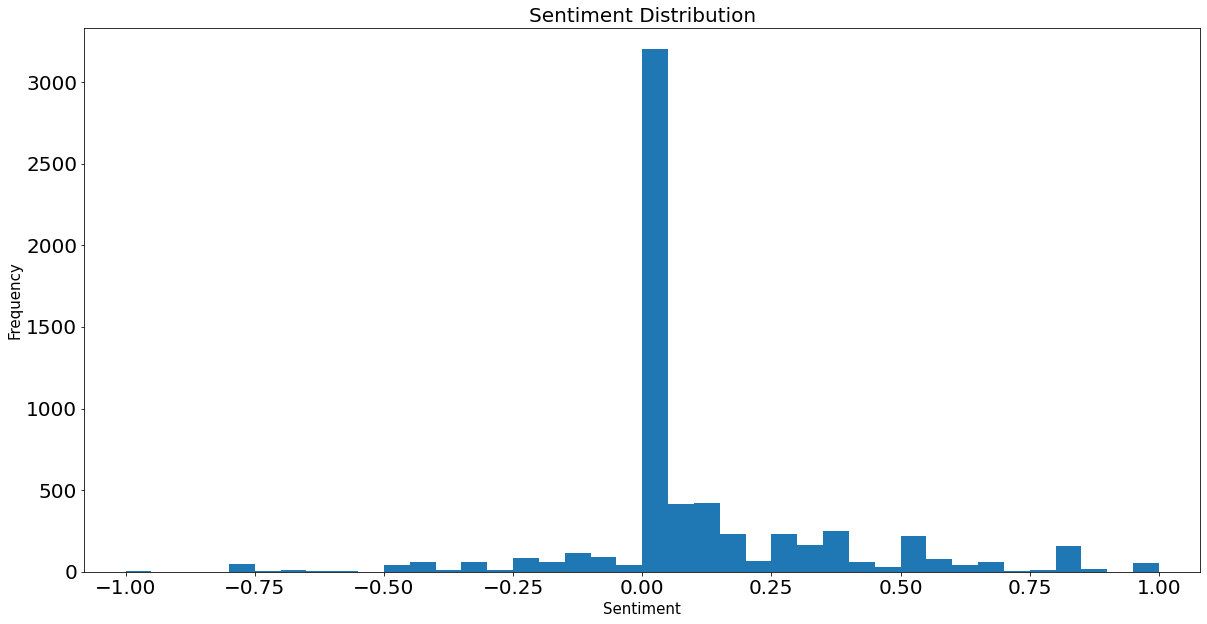

In [47]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(df['polarity'], bins=40)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

In [56]:
# function to analyze the reviews based on polarity check
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
df['Analysis'] = df['polarity'].apply(getAnalysis)


In [57]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower,stemmed,lemma,polarity,Analysis
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[the, web, designerûªs, guide, to, ios, and, a...",the web designerûª guid to io and android app ...,the web designerûª guid to io and android app ...,0.0,Neutral
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod...",rt mention line for ipad is longer today than ...,rt mention line for ipad is longer today than ...,0.3,Positive
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[crazy, that, apple, is, opening, a, temporary...",crazi that appl is open a temporari store in a...,crazi that appl is open a temporari store in a...,0.0,Neutral
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[the, lesson, from, google, one, pass, in, thi...",the lesson from googl one pass in thi digit en...,the lesson from googl one pas in thi digit env...,0.0,Neutral
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[rt, mention, at, the, panel, quotyour, mom, h...",rt mention at the panel quotyour mom ha an ipa...,rt mention at the panel quotyour mom ha an ipa...,0.0,Neutral


In [58]:
Neutral_senti=df[df['polarity']==0]

In [59]:
Positive_senti=df[df['polarity']>0]

In [60]:
Negative_senti=df[df['polarity']<0]

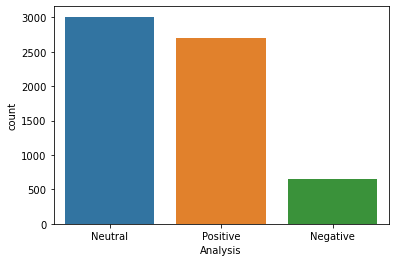

In [61]:
import seaborn as sns
sns.countplot(x='Analysis',data=df)
plt.show()

# Feature Extraction

In [62]:
Positive_senti.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower,stemmed,lemma,polarity,Analysis
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod...",rt mention line for ipad is longer today than ...,rt mention line for ipad is longer today than ...,0.300000,Positive
7,2975,Wow! RT@mention We interrupt your regularly sc...,9,3,Wow RTmention We interrupt your regularly sche...,"[Wow, RTmention, We, interrupt, your, regularl...",Wow RTmention We interrupt your regularly sche...,"[Wow, RTmention, We, interrupt, your, regularl...","[wow, rtmention, we, interrupt, your, regularl...",wow rtmention we interrupt your regularli sche...,wow rtmention we interrupt your regularli sche...,0.050000,Positive
8,818,Google to Launch New Social Network Called Cir...,9,2,Google to Launch New Social Network Called Cir...,"[Google, to, Launch, New, Social, Network, Cal...",Google to Launch New Social Network Called Cir...,"[Google, to, Launch, New, Social, Network, Cal...","[google, to, launch, new, social, network, cal...",googl to launch new social network call circl ...,googl to launch new social network call circl ...,0.084848,Positive
9,1318,@mention Welcome! Enjoy #Sxsw and ride anywhe...,9,2,mention Welcome Enjoy Sxsw and ride anywhere ...,"[mention, Welcome, Enjoy, Sxsw, and, ride, any...",mention Welcome Enjoy Sxsw and ride anywhere i...,"[mention, Welcome, Enjoy, Sxsw, and, ride, any...","[mention, welcome, enjoy, sxsw, and, ride, any...",mention welcom enjoy sxsw and ride anywher in ...,mention welcom enjoy sxsw and ride anywher in ...,0.400000,Positive
11,1618,Yeay! RT @mention New #UberSocial for #iPhone ...,7,3,Yeay RT mention New UberSocial for iPhone now ...,"[Yeay, RT, mention, New, UberSocial, for, iPho...",Yeay RT mention New UberSocial for iPhone now ...,"[Yeay, RT, mention, New, UberSocial, for, iPho...","[yeay, rt, mention, new, ubersocial, for, ipho...",yeay rt mention new ubersoci for iphon now in ...,yeay rt mention new ubersoci for iphon now in ...,0.136364,Positive


In [63]:
positive_reviews=Positive_senti['lemma']

In [64]:
positive_rev=pd.DataFrame(data=positive_reviews)
positive_rev

,lemma
1,rt mention line for ipad is longer today than ...
7,wow rtmention we interrupt your regularli sche...
8,googl to launch new social network call circl ...
9,mention welcom enjoy sxsw and ride anywher in ...
11,yeay rt mention new ubersoci for iphon now in ...
...,...
6356,i would give my appl stock to be more like men...
6357,rt mention new ubersoci for iphon now in the a...
6361,rt mention rt mention download free track from...
6362,oh at texa social medium award you do not need...


# Positive reviews Wordcloud


In [65]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')


In [67]:
Positive = wc.generate(df[df['polarity']>0]['lemma'].str.cat(sep=""))

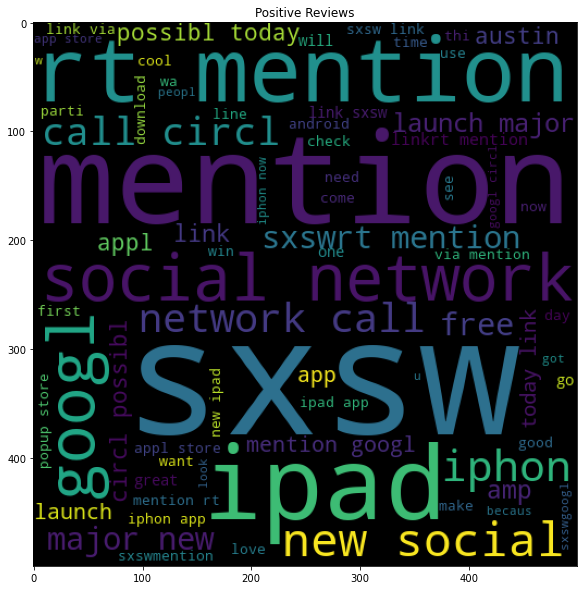

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()


# Negative reviews wordcloud

In [70]:
Negative=wc.generate(df[df['polarity']<0]['lemma'].str.cat(sep=""))

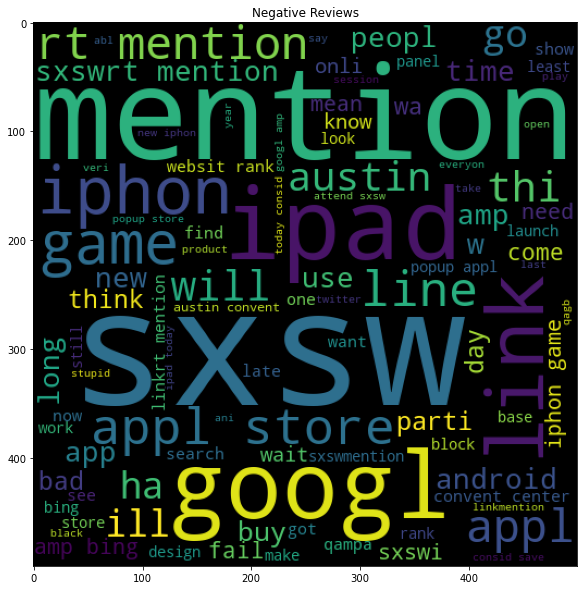

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

# Neutral reviews wordcloud


In [73]:
Neutral = wc.generate(df[df['polarity']==0]['lemma'].str.cat(sep=""))

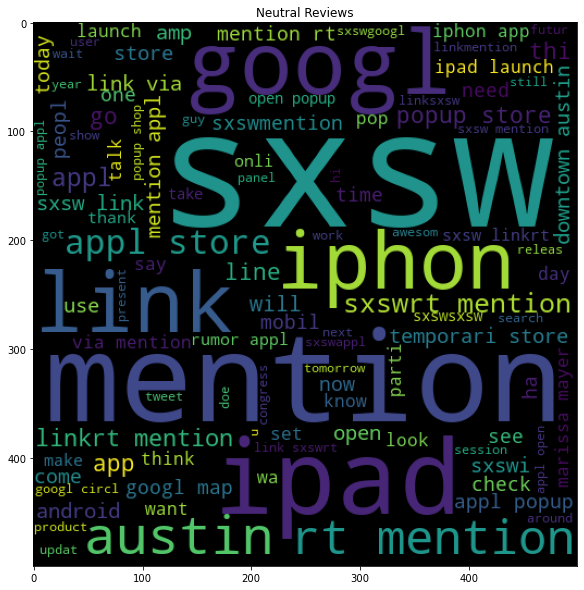

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

### clean some unwanted words by own using stopwords

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
sw_nltk = stopwords.words('english')

In [87]:
sw_nltk.extend(['mention','SXSW','link','will','use','rt','sxswi','sxswrt','wa','peopl','ha','still','designerûª','today','yesterday','sxsw','crazi','quotyour','pas','thi','boomersquot'])

In [88]:
df['cleaned'] = df['lemma'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [89]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Review,no_contract,expandedtext,tokenized,lower,stemmed,lemma,polarity,Analysis,cleaned
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...",The Web DesignerÛªs Guide to iOS and Android A...,"[The, Web, DesignerÛªs, Guide, to, iOS, and, A...","[the, web, designerûªs, guide, to, ios, and, a...",the web designerûª guid to io and android app ...,the web designerûª guid to io and android app ...,0.0,Neutral,"[web, guid, io, android, app]"
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,RT mention Line for iPad is longer today than...,"[RT, mention, Line, for, iPad, is, longer, tod...",RT mention Line for iPad is longer today than ...,"[RT, mention, Line, for, iPad, is, longer, tod...","[rt, mention, line, for, ipad, is, longer, tod...",rt mention line for ipad is longer today than ...,rt mention line for ipad is longer today than ...,0.3,Positive,"[line, ipad, longer, get, line, fun]"
2,8212,Crazy that Apple is opening a temporary store ...,9,2,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...","[crazy, that, apple, is, opening, a, temporary...",crazi that appl is open a temporari store in a...,crazi that appl is open a temporari store in a...,0.0,Neutral,"[appl, open, temporari, store, austin, tomorro..."
3,4422,The lesson from Google One Pass: In this digit...,9,2,The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...",The lesson from Google One Pass In this digita...,"[The, lesson, from, Google, One, Pass, In, thi...","[the, lesson, from, google, one, pass, in, thi...",the lesson from googl one pass in thi digit en...,the lesson from googl one pas in thi digit env...,0.0,Neutral,"[lesson, googl, one, digit, environ, user, wan..."
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...",RT mention At the panel quotYour mom has an ip...,"[RT, mention, At, the, panel, quotYour, mom, h...","[rt, mention, at, the, panel, quotyour, mom, h...",rt mention at the panel quotyour mom ha an ipa...,rt mention at the panel quotyour mom ha an ipa...,0.0,Neutral,"[panel, mom, ipad, design]"


In [92]:
df['cleaned_1']=df['cleaned'].apply(' '.join)

In [93]:
df['cleaned_1']

0                                 web guid io android app
1                           line ipad longer get line fun
2       appl open temporari store austin tomorrow hand...
3       lesson googl one digit environ user want purch...
4                                   panel mom ipad design
                              ...                        
6359                                     thank host event
6360           iphon app awesom ipad app crash everi time
6361       download free track music sampler includ glove
6362    oh texa social medium award need ask mother an...
6363    googl launch quotmajorquot new social network ...
Name: cleaned_1, Length: 6364, dtype: object

# Building a new wordcloud after removing unwanted words

In [90]:
#Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [94]:
text = ' '.join(df['cleaned_1'])

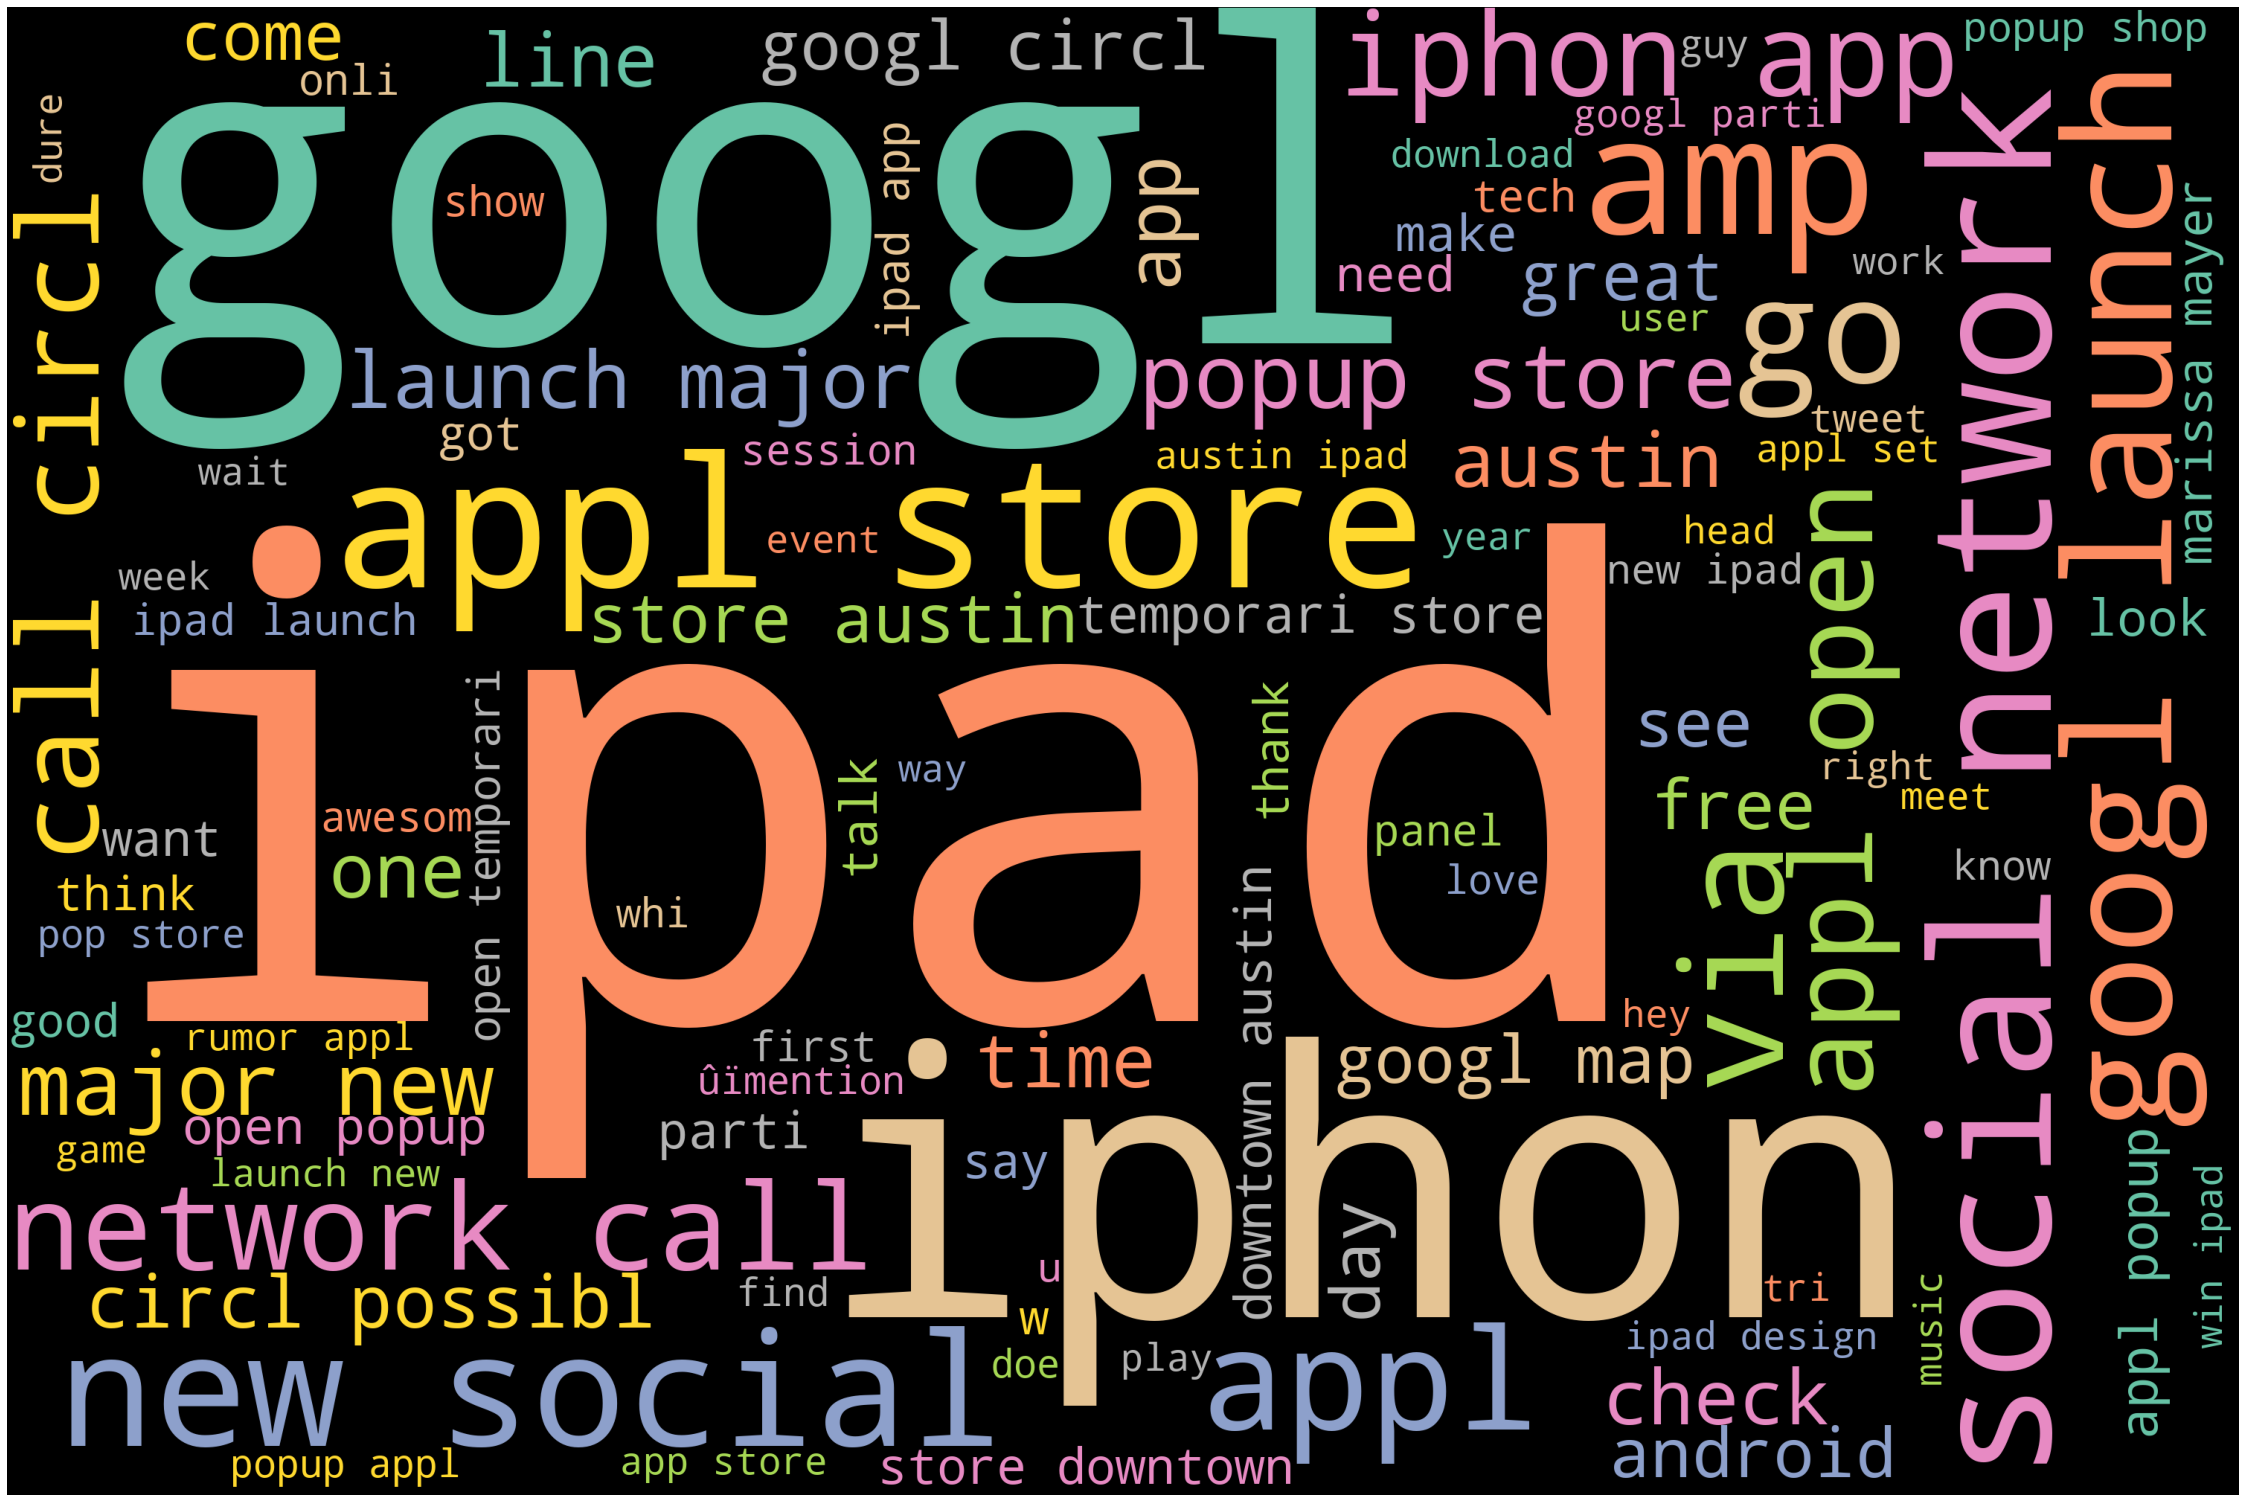

In [97]:
# Generate wordcloud
stopwords = STOPWORDS
# stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [100]:
# words into vector -BOW,Tf-idf,Wordevec